In [2]:
# file kfkd.py
import os

import numpy as np
from pandas.io.parsers import read_csv
from sklearn.utils import shuffle


FTRAIN = '~/study/berkeley/homework/ml/coursework/Final/training.csv'
FTEST = '~/study/berkeley/homework/ml/coursework/Final/test.csv'


def load(test=False, cols=None):
    """Loads data from FTEST if *test* is True, otherwise from FTRAIN.
    Pass a list of *cols* if you're only interested in a subset of the
    target columns.
    """
    fname = FTEST if test else FTRAIN
    df = read_csv(os.path.expanduser(fname))  # load pandas dataframe

    # The Image column has pixel values separated by space; convert
    # the values to numpy arrays:
    df['Image'] = df['Image'].apply(lambda im: np.fromstring(im, sep=' '))

    if cols:  # get a subset of columns
        df = df[list(cols) + ['Image']]

    print(df.count())  # prints the number of values for each column
    df = df.dropna()  # drop all rows that have missing values in them

    X = np.vstack(df['Image'].values) / 255.  # scale pixel values to [0, 1]
    X = X.astype(np.float32)

    if not test:  # only FTRAIN has any target columns
        y = df[df.columns[:-1]].values
        y = (y - 48) / 48  # scale target coordinates to [-1, 1]
        X, y = shuffle(X, y, random_state=42)  # shuffle train data
        y = y.astype(np.float32)
    else:
        y = None

    return X, y


X, y = load()
print("X.shape == {}; X.min == {:.3f}; X.max == {:.3f}".format(
    X.shape, X.min(), X.max()))
print("y.shape == {}; y.min == {:.3f}; y.max == {:.3f}".format(
    y.shape, y.min(), y.max()))

left_eye_center_x            7039
left_eye_center_y            7039
right_eye_center_x           7036
right_eye_center_y           7036
left_eye_inner_corner_x      2271
left_eye_inner_corner_y      2271
left_eye_outer_corner_x      2267
left_eye_outer_corner_y      2267
right_eye_inner_corner_x     2268
right_eye_inner_corner_y     2268
right_eye_outer_corner_x     2268
right_eye_outer_corner_y     2268
left_eyebrow_inner_end_x     2270
left_eyebrow_inner_end_y     2270
left_eyebrow_outer_end_x     2225
left_eyebrow_outer_end_y     2225
right_eyebrow_inner_end_x    2270
right_eyebrow_inner_end_y    2270
right_eyebrow_outer_end_x    2236
right_eyebrow_outer_end_y    2236
nose_tip_x                   7049
nose_tip_y                   7049
mouth_left_corner_x          2269
mouth_left_corner_y          2269
mouth_right_corner_x         2270
mouth_right_corner_y         2270
mouth_center_top_lip_x       2275
mouth_center_top_lip_y       2275
mouth_center_bottom_lip_x    7016
mouth_center_b

In [ ]:
#X

In [ ]:
#df = read_csv(os.path.expanduser("~/study/berkeley/homework/ml/coursework/Final/training.csv"))

In [8]:
#df

In [9]:
#df.count()

In [10]:
#df[df.columns[:-1]].values

In [3]:
# add to kfkd.py
from lasagne import layers
from lasagne.updates import nesterov_momentum
from nolearn.lasagne import NeuralNet

net1 = NeuralNet(
    layers=[  # three layers: one hidden layer
        ('input', layers.InputLayer),
        ('hidden', layers.DenseLayer),
        ('output', layers.DenseLayer),
        ],
    # layer parameters:
    input_shape=(None, 9216),  # 96x96 input pixels per batch
    hidden_num_units=100,  # number of units in hidden layer
    output_nonlinearity=None,  # output layer uses identity function
    output_num_units=30,  # 30 target values

    # optimization method:
    update=nesterov_momentum,
    update_learning_rate=0.01,
    update_momentum=0.9,

    regression=True,  # flag to indicate we're dealing with regression problem
    max_epochs=400,  # we want to train this many epochs
    verbose=1,
    )

X, y = load()
net1.fit(X, y)

/Users/v829576/anaconda2/lib/python2.7/site-packages/theano/tensor/signal/downsample.py:6: UserWarning: downsample module has been moved to the theano.tensor.signal.pool module.
  "downsample module has been moved to the theano.tensor.signal.pool module.")


left_eye_center_x            7039
left_eye_center_y            7039
right_eye_center_x           7036
right_eye_center_y           7036
left_eye_inner_corner_x      2271
left_eye_inner_corner_y      2271
left_eye_outer_corner_x      2267
left_eye_outer_corner_y      2267
right_eye_inner_corner_x     2268
right_eye_inner_corner_y     2268
right_eye_outer_corner_x     2268
right_eye_outer_corner_y     2268
left_eyebrow_inner_end_x     2270
left_eyebrow_inner_end_y     2270
left_eyebrow_outer_end_x     2225
left_eyebrow_outer_end_y     2225
right_eyebrow_inner_end_x    2270
right_eyebrow_inner_end_y    2270
right_eyebrow_outer_end_x    2236
right_eyebrow_outer_end_y    2236
nose_tip_x                   7049
nose_tip_y                   7049
mouth_left_corner_x          2269
mouth_left_corner_y          2269
mouth_right_corner_x         2270
mouth_right_corner_y         2270
mouth_center_top_lip_x       2275
mouth_center_top_lip_y       2275
mouth_center_bottom_lip_x    7016
mouth_center_b

/Users/v829576/study/W207KaggleFaceFeature/GPU/src/lasagne/lasagne/init.py:86: UserWarning: The uniform initializer no longer uses Glorot et al.'s approach to determine the bounds, but defaults to the range (-0.01, 0.01) instead. Please use the new GlorotUniform initializer to get the old behavior. GlorotUniform is now the default for all layers.
  warnings.warn("The uniform initializer no longer uses Glorot et al.'s "
/Users/v829576/anaconda2/lib/python2.7/site-packages/nolearn/lasagne/base.py:259: UserWarning: The Param class is deprecated. Replace Param(default=N) by theano.In(value=N)
  inputs=[theano.Param(X_batch), theano.Param(y_batch)],


  input             	(None, 9216)        	produces    9216 outputs
  hidden            	(None, 100)         	produces     100 outputs
  output            	(None, 30)          	produces      30 outputs


/Users/v829576/anaconda2/lib/python2.7/site-packages/nolearn/lasagne/base.py:268: UserWarning: The Param class is deprecated. Replace Param(default=N) by theano.In(value=N)
  inputs=[theano.Param(X_batch), theano.Param(y_batch)],
/Users/v829576/anaconda2/lib/python2.7/site-packages/nolearn/lasagne/base.py:276: UserWarning: The Param class is deprecated. Replace Param(default=N) by theano.In(value=N)
  inputs=[theano.Param(X_batch)],


  epoch    train loss    valid loss    train/val  dur
-------  ------------  ------------  -----------  -----
      1       0.19470       0.05883      3.30979  0.33s
      2       0.03648       0.01993      1.83089  0.26s
      3       0.01453       0.01299      1.11822  0.26s
      4       0.01172       0.01229      0.95287  0.27s
      5       0.01111       0.01168      0.95057  0.30s
      6       0.01052       0.01116      0.94272  0.25s
      7       0.01007       0.01076      0.93642  0.26s
      8       0.00970       0.01039      0.93385  0.26s
      9       0.00937       0.01005      0.93205  0.26s
     10       0.00908       0.00976      0.92967  0.26s
     11       0.00883       0.00952      0.92725  0.26s
     12       0.00863       0.00933      0.92579  0.26s
     13       0.00846       0.00915      0.92518  0.26s
     14       0.00831       0.00899      0.92478  0.27s
     15       0.00817       0.00884      0.92445  0.33s
     16       0.00804       0.00870      0.92420  

NeuralNet(X_tensor_type=<function matrix at 0x117d51de8>,
     batch_iterator_test=<nolearn.lasagne.base.BatchIterator object at 0x118ed6650>,
     batch_iterator_train=<nolearn.lasagne.base.BatchIterator object at 0x118ebb990>,
     custom_score=None, eval_size=0.2, hidden_num_units=100,
     input_shape=(None, 9216),
     layers=[('input', <class 'lasagne.layers.input.InputLayer'>), ('hidden', <class 'lasagne.layers.dense.DenseLayer'>), ('output', <class 'lasagne.layers.dense.DenseLayer'>)],
     loss=None, max_epochs=400, more_params={},
     objective=<class 'lasagne.objectives.Objective'>,
     objective_loss_function=<function mse at 0x118db9b18>,
     on_epoch_finished=[<nolearn.lasagne.util.PrintLog instance at 0x1152d3170>],
     on_training_finished=[], output_nonlinearity=None,
     output_num_units=30, regression=True,
     update=<function nesterov_momentum at 0x118dbe578>,
     update_learning_rate=0.01, update_momentum=0.9,
     use_label_encoder=False, verbose=1,
     y

[[ 0.          0.          0.         ...,  0.19873047 -2.25915527
  -2.18489075]
 [ 0.          0.          0.         ..., -0.5161438  -0.96224213
   2.41339111]
 [ 0.          0.          0.         ...,  0.8862915  -4.67359924
   1.46942139]
 ..., 
 [ 5.18228292 -1.85937405 -0.68578076 ..., -1.46173084  2.29254317
  -1.60822272]
 [ 0.495309    1.57126808 -1.00870466 ..., -0.40027255  0.61183882
  -2.71195841]
 [-6.43314648 -0.53454071  5.0537734  ...,  0.3871547   0.9749527
  -0.49535745]]
(96, 96)


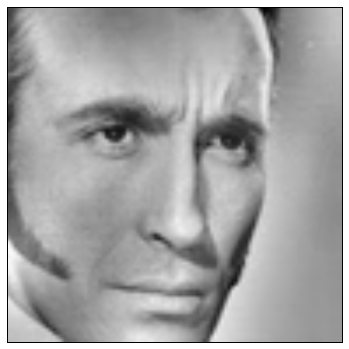

In [55]:
%matplotlib inline

from scipy import fftpack
import matplotlib.pyplot as pyplot

#fft2 = fftpack.fft2(X[0].reshape(96,96))

#fft2back = fftpack.ifft2(fft2)

#print fft2back.shape
#print X[0].shape

dct = fftpack.dct(X[111].reshape(96,96))
dctback = fftpack.idct(dct)

dct2 = fftpack.dct(dct.T)
#print dct2

#dct2[0,0] = 0
#dct2[0,1] = 0
#dct2[1,0] = 0
#dct2[1,1] = 0

dct2[0:5,0:5] = 0

print dct2
#print dct2[0,0]

#print dct2

idct = fftpack.idct(dct2)
idct2 = fftpack.idct(idct.T)

fig = pyplot.figure(figsize=(6, 6))
ax = fig.add_subplot(1, 1, 1, xticks=[], yticks=[])
#ax.imshow(X[0].reshape(96,96), cmap='gray')

print dct.shape
ax.imshow(idct2, cmap='gray')






[ 0.79607844  0.70588237  0.59607846 ...,  0.11372549  0.14901961
  0.17254902]
[[  5.85515976e-01   4.93143380e-01   3.79010797e-01 ...,   5.50106056e-02
    6.93426281e-02   9.22121108e-02]
 [  6.01840913e-01   6.11440480e-01   4.22820628e-01 ...,   5.88046573e-02
    8.09447765e-02   9.98750329e-02]
 [  6.03111863e-01   4.87243742e-01   2.12394029e-01 ...,   7.42362887e-02
    6.49343878e-02   9.16728079e-02]
 ..., 
 [ -1.51894651e-02  -1.80116780e-02  -1.97606497e-02 ...,   8.09648726e-03
    2.55131419e-03   2.52572857e-02]
 [ -1.52010210e-02  -1.40959565e-02  -1.58335567e-02 ...,   4.32502665e-03
    1.83874369e-02   4.10932787e-02]
 [ -3.44235264e-03  -6.25602342e-03  -7.98803009e-03 ...,   4.78757545e-04
    3.41490135e-02   5.68548515e-02]]
[[ -5.96046448e-07   1.84774399e-06  -3.03983688e-06 ...,  -9.61124897e-07
    7.07805157e-07  -1.63912773e-07]
 [  1.78813934e-06  -5.36441803e-06   9.00030136e-06 ...,   3.21120024e-06
   -1.86264515e-06   7.30156898e-07]
 [ -2.92062759e-

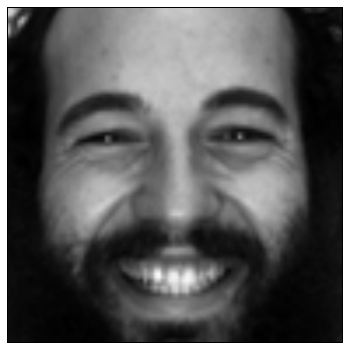

In [68]:
%matplotlib inline

from scipy import fftpack
import matplotlib.pyplot as pyplot

def dct2(xIn, xDim = 96, yDim = 96):
    #dctback = fftpack.idct(dct)

    return fftpack.dct(fftpack.dct(xIn.reshape(xDim,yDim), norm = 'ortho').T, norm = 'ortho')

def idct2(xIn2Dim):
    return fftpack.idct(fftpack.idct(xIn2Dim, norm = 'ortho').T, norm = 'ortho')

def primHPF(xIn2Dim, level = 5):
    shape0 = xIn2Dim.shape[0]
    shape1 = xIn2Dim.shape[1]
    
    for i in range(shape0 - level, shape0):
        for j in range(shape1 - level, shape1):
            xIn2Dim[i,j] = 0
    return xIn2Dim

def primLPF(xIn2Dim, level = 5):
    for i in range(level):
        for j in range(level):
            xIn2Dim[i,j] = 0
    return xIn2Dim



fig = pyplot.figure(figsize=(6, 6))
ax = fig.add_subplot(1, 1, 1, xticks=[], yticks=[])

xNew = idct2(primLPF(dct2(X[0])))

print X[0]

print xNew

xNew = idct2(primHPF(dct2(X[0])))

print xNew - X[0].reshape(96,96)

xNew = X[0].reshape(96,96)

print dct.shape
ax.imshow(xNew, cmap='gray')

# reload to get a fresh start
X, y = load()

lpfX = np.empty_like(X)
for i in range(X.shape[0]):
    lpfX[i] = idct2(primLPF(dct2(X[i]))).reshape(96 * 96)

X, y = load()
hpfX = np.empty_like(X)
for i in range(X.shape[0]):
    hpfX[i] = idct2(primHPF(dct2(X[i]))).reshape(96 * 96)

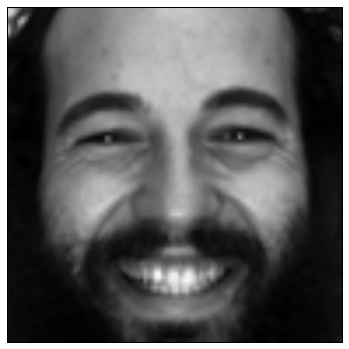

In [73]:
%matplotlib inline

fig = pyplot.figure(figsize=(6, 6))
ax = fig.add_subplot(1, 1, 1, xticks=[], yticks=[])

ax.imshow(lpfX[0].reshape(96, 96), cmap='gray')

ax.imshow(hpfX[0].reshape(96, 96), cmap='gray')

In [78]:
from lasagne import layers
from lasagne.updates import nesterov_momentum
from nolearn.lasagne import NeuralNet

net1 = NeuralNet(
    layers=[  # three layers: one hidden layer
        ('input', layers.InputLayer),
        ('hidden', layers.DenseLayer),
        ('output', layers.DenseLayer),
        ],
    # layer parameters:
    input_shape=(None, 9216),  # 96x96 input pixels per batch
    hidden_num_units=100,  # number of units in hidden layer
    output_nonlinearity=None,  # output layer uses identity function
    output_num_units=30,  # 30 target values

    # optimization method:
    update=nesterov_momentum,
    update_learning_rate=0.01,
    update_momentum=0.9,

    regression=True,  # flag to indicate we're dealing with regression problem
    max_epochs=400,  # we want to train this many epochs
    verbose=1,
    )

net1.fit(lpfX, y)

  input             	(None, 9216)        	produces    9216 outputs
  hidden            	(None, 100)         	produces     100 outputs
  output            	(None, 30)          	produces      30 outputs
  epoch    train loss    valid loss    train/val  dur
-------  ------------  ------------  -----------  -----
      1       0.11411       0.06637      1.71931  0.26s
      2       0.05111       0.03938      1.29785  0.27s
      3       0.03177       0.02833      1.12146  0.25s
      4       0.02487       0.02437      1.02075  0.26s
      5       0.02180       0.02206      0.98844  0.25s
      6       0.01980       0.02039      0.97081  0.25s
      7       0.01828       0.01907      0.95836  0.25s
      8       0.01706       0.01800      0.94805  0.26s
      9       0.01605       0.01710      0.93884  0.27s
     10       0.01519       0.01633      0.93020  0.25s
     11       0.01444       0.01565      0.92224  0.26s
     12       0.01377       0.01506      0.91481  0.25s
     13       0.0

NeuralNet(X_tensor_type=<function matrix at 0x11d1570c8>,
     batch_iterator_test=<nolearn.lasagne.base.BatchIterator object at 0x11dadad90>,
     batch_iterator_train=<nolearn.lasagne.base.BatchIterator object at 0x11dad2090>,
     custom_score=None, eval_size=0.2, hidden_num_units=100,
     input_shape=(None, 9216),
     layers=[('input', <class 'lasagne.layers.input.InputLayer'>), ('hidden', <class 'lasagne.layers.dense.DenseLayer'>), ('output', <class 'lasagne.layers.dense.DenseLayer'>)],
     loss=None, max_epochs=400, more_params={},
     objective=<class 'lasagne.objectives.Objective'>,
     objective_loss_function=<function mse at 0x11da020c8>,
     on_epoch_finished=[<nolearn.lasagne.util.PrintLog instance at 0x11e0459e0>],
     on_training_finished=[], output_nonlinearity=None,
     output_num_units=30, regression=True,
     update=<function nesterov_momentum at 0x11da02aa0>,
     update_learning_rate=0.01, update_momentum=0.9,
     use_label_encoder=False, verbose=1,
     y

In [79]:
np.sqrt(0.00382) * 48

2.966695130949589

In [80]:
from lasagne import layers
from lasagne.updates import nesterov_momentum
from nolearn.lasagne import NeuralNet

net1 = NeuralNet(
    layers=[  # three layers: one hidden layer
        ('input', layers.InputLayer),
        ('hidden', layers.DenseLayer),
        ('output', layers.DenseLayer),
        ],
    # layer parameters:
    input_shape=(None, 9216),  # 96x96 input pixels per batch
    hidden_num_units=100,  # number of units in hidden layer
    output_nonlinearity=None,  # output layer uses identity function
    output_num_units=30,  # 30 target values

    # optimization method:
    update=nesterov_momentum,
    update_learning_rate=0.01,
    update_momentum=0.9,

    regression=True,  # flag to indicate we're dealing with regression problem
    max_epochs=400,  # we want to train this many epochs
    verbose=1,
    )

net1.fit(hpfX, y)

  input             	(None, 9216)        	produces    9216 outputs
  hidden            	(None, 100)         	produces     100 outputs
  output            	(None, 30)          	produces      30 outputs
  epoch    train loss    valid loss    train/val  dur
-------  ------------  ------------  -----------  -----
      1       0.18994       0.05492      3.45831  0.29s
      2       0.03612       0.02273      1.58942  0.27s
      3       0.01626       0.01511      1.07631  0.27s
      4       0.01278       0.01383      0.92390  0.28s
      5       0.01189       0.01292      0.92004  0.27s
      6       0.01116       0.01219      0.91517  0.27s
      7       0.01062       0.01161      0.91447  0.26s
      8       0.01020       0.01119      0.91167  0.28s
      9       0.00985       0.01082      0.91028  0.28s
     10       0.00955       0.01050      0.91009  0.26s
     11       0.00929       0.01022      0.90941  0.25s
     12       0.00907       0.00997      0.90978  0.26s
     13       0.0

NeuralNet(X_tensor_type=<function matrix at 0x11d1570c8>,
     batch_iterator_test=<nolearn.lasagne.base.BatchIterator object at 0x11dadad90>,
     batch_iterator_train=<nolearn.lasagne.base.BatchIterator object at 0x11dad2090>,
     custom_score=None, eval_size=0.2, hidden_num_units=100,
     input_shape=(None, 9216),
     layers=[('input', <class 'lasagne.layers.input.InputLayer'>), ('hidden', <class 'lasagne.layers.dense.DenseLayer'>), ('output', <class 'lasagne.layers.dense.DenseLayer'>)],
     loss=None, max_epochs=400, more_params={},
     objective=<class 'lasagne.objectives.Objective'>,
     objective_loss_function=<function mse at 0x11da020c8>,
     on_epoch_finished=[<nolearn.lasagne.util.PrintLog instance at 0x11c86c098>],
     on_training_finished=[], output_nonlinearity=None,
     output_num_units=30, regression=True,
     update=<function nesterov_momentum at 0x11da02aa0>,
     update_learning_rate=0.01, update_momentum=0.9,
     use_label_encoder=False, verbose=1,
     y

In [81]:
np.sqrt(0.00329) * 48

2.7532090367423976

In [83]:
X, y = load()

hpfX10 = np.empty_like(X)
for i in range(X.shape[0]):
    hpfX[i] = idct2(primHPF(dct2(X[i]), level=10)).reshape(96 * 96)
    
net1 = NeuralNet(
    layers=[  # three layers: one hidden layer
        ('input', layers.InputLayer),
        ('hidden', layers.DenseLayer),
        ('output', layers.DenseLayer),
        ],
    # layer parameters:
    input_shape=(None, 9216),  # 96x96 input pixels per batch
    hidden_num_units=100,  # number of units in hidden layer
    output_nonlinearity=None,  # output layer uses identity function
    output_num_units=30,  # 30 target values

    # optimization method:
    update=nesterov_momentum,
    update_learning_rate=0.01,
    update_momentum=0.9,

    regression=True,  # flag to indicate we're dealing with regression problem
    max_epochs=400,  # we want to train this many epochs
    verbose=1,
    )

net1.fit(hpfX10, y)

left_eye_center_x            7039
left_eye_center_y            7039
right_eye_center_x           7036
right_eye_center_y           7036
left_eye_inner_corner_x      2271
left_eye_inner_corner_y      2271
left_eye_outer_corner_x      2267
left_eye_outer_corner_y      2267
right_eye_inner_corner_x     2268
right_eye_inner_corner_y     2268
right_eye_outer_corner_x     2268
right_eye_outer_corner_y     2268
left_eyebrow_inner_end_x     2270
left_eyebrow_inner_end_y     2270
left_eyebrow_outer_end_x     2225
left_eyebrow_outer_end_y     2225
right_eyebrow_inner_end_x    2270
right_eyebrow_inner_end_y    2270
right_eyebrow_outer_end_x    2236
right_eyebrow_outer_end_y    2236
nose_tip_x                   7049
nose_tip_y                   7049
mouth_left_corner_x          2269
mouth_left_corner_y          2269
mouth_right_corner_x         2270
mouth_right_corner_y         2270
mouth_center_top_lip_x       2275
mouth_center_top_lip_y       2275
mouth_center_bottom_lip_x    7016
mouth_center_b

NeuralNet(X_tensor_type=<function matrix at 0x11d1570c8>,
     batch_iterator_test=<nolearn.lasagne.base.BatchIterator object at 0x11dadad90>,
     batch_iterator_train=<nolearn.lasagne.base.BatchIterator object at 0x11dad2090>,
     custom_score=None, eval_size=0.2, hidden_num_units=100,
     input_shape=(None, 9216),
     layers=[('input', <class 'lasagne.layers.input.InputLayer'>), ('hidden', <class 'lasagne.layers.dense.DenseLayer'>), ('output', <class 'lasagne.layers.dense.DenseLayer'>)],
     loss=None, max_epochs=400, more_params={},
     objective=<class 'lasagne.objectives.Objective'>,
     objective_loss_function=<function mse at 0x11da020c8>,
     on_epoch_finished=[<nolearn.lasagne.util.PrintLog instance at 0x1208a2680>],
     on_training_finished=[], output_nonlinearity=None,
     output_num_units=30, regression=True,
     update=<function nesterov_momentum at 0x11da02aa0>,
     update_learning_rate=0.01, update_momentum=0.9,
     use_label_encoder=False, verbose=1,
     y

In [84]:
np.sqrt(0.00312) * 48

2.6811340884036365

In [90]:
import cPickle as pickle

with open('lpf5.pickle', 'wb') as f:
    pickle.dump(lpfX, f, -1)
    
with open('hpf5.pickle', 'wb') as f:
    pickle.dump(hpfX, f, -1)
    
with open('hpf10.pickle', 'wb') as f:
    pickle.dump(hpfX10, f, -1)

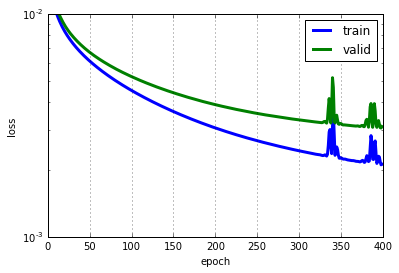

In [85]:
%matplotlib inline

import matplotlib.pyplot as pyplot

train_loss = np.array([i["train_loss"] for i in net1.train_history_])
valid_loss = np.array([i["valid_loss"] for i in net1.train_history_])
pyplot.plot(train_loss, linewidth=3, label="train")
pyplot.plot(valid_loss, linewidth=3, label="valid")
pyplot.grid()
pyplot.legend()
pyplot.xlabel("epoch")
pyplot.ylabel("loss")
pyplot.ylim(1e-3, 1e-2)
pyplot.yscale("log")
pyplot.show()

ImageId    1783
Image      1783
dtype: int64


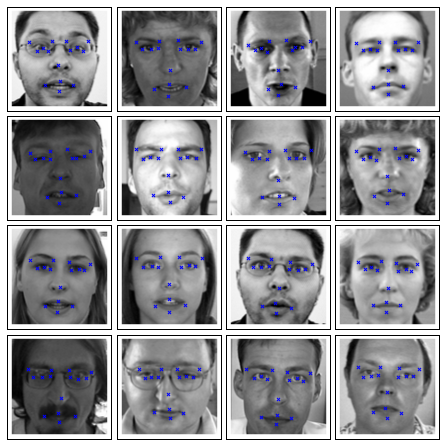

In [18]:
def plot_sample(x, y, axis):
    img = x.reshape(96, 96)
    axis.imshow(img, cmap='gray')
    axis.scatter(y[0::2] * 48 + 48, y[1::2] * 48 + 48, marker='x', s=10)

X, _ = load(test=True)
y_pred = net1.predict(X)

fig = pyplot.figure(figsize=(6, 6))
fig.subplots_adjust(
    left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for i in range(16):
    ax = fig.add_subplot(4, 4, i + 1, xticks=[], yticks=[])
    plot_sample(X[i], y_pred[i], ax)

pyplot.show()

In [19]:
def load2d(test=False, cols=None):
    X, y = load(test=test)
    X = X.reshape(-1, 1, 96, 96)
    return X, y

In [101]:
def load2dFilter(l = 5):
    X, y = load()
    newX = np.empty_like(X)
    for i in range(X.shape[0]):
        newX[i] = idct2(primHPF(dct2(X[i]), level=l)).reshape(96 * 96)
    newX = newX.reshape(-1, 1, 96, 96)
    
    return newX, y

In [ ]:
net2 = NeuralNet(
    layers=[
        ('input', layers.InputLayer),
        ('conv1', layers.Conv2DLayer),
        ('pool1', layers.MaxPool2DLayer),
        ('conv2', layers.Conv2DLayer),
        ('pool2', layers.MaxPool2DLayer),
        ('conv3', layers.Conv2DLayer),
        ('pool3', layers.MaxPool2DLayer),
        ('hidden4', layers.DenseLayer),
        ('hidden5', layers.DenseLayer),
        ('output', layers.DenseLayer),
        ],
    input_shape=(None, 1, 96, 96),
    conv1_num_filters=32, conv1_filter_size=(3, 3), pool1_pool_size=(2, 2),
    conv2_num_filters=64, conv2_filter_size=(2, 2), pool2_pool_size=(2, 2),
    conv3_num_filters=128, conv3_filter_size=(2, 2), pool3_pool_size=(2, 2),
    hidden4_num_units=500, hidden5_num_units=500,
    output_num_units=30, output_nonlinearity=None,

    update_learning_rate=0.01,
    update_momentum=0.9,

    regression=True,
    max_epochs=1000,
    verbose=1,
    )

#X, y = load2d()  # load 2-d data
#net2.fit(X, y)

hpf10, y = load2dFilter(l=10)

net2.fit(hpf10, y)


# Training for 1000 epochs will take a while.  We'll pickle the
# trained model so that we can load it back later:
import cPickle as pickle
with open('net2hpf10.pickle', 'wb') as f:
    pickle.dump(net2hpf10, f, -1)

left_eye_center_x            7039
left_eye_center_y            7039
right_eye_center_x           7036
right_eye_center_y           7036
left_eye_inner_corner_x      2271
left_eye_inner_corner_y      2271
left_eye_outer_corner_x      2267
left_eye_outer_corner_y      2267
right_eye_inner_corner_x     2268
right_eye_inner_corner_y     2268
right_eye_outer_corner_x     2268
right_eye_outer_corner_y     2268
left_eyebrow_inner_end_x     2270
left_eyebrow_inner_end_y     2270
left_eyebrow_outer_end_x     2225
left_eyebrow_outer_end_y     2225
right_eyebrow_inner_end_x    2270
right_eyebrow_inner_end_y    2270
right_eyebrow_outer_end_x    2236
right_eyebrow_outer_end_y    2236
nose_tip_x                   7049
nose_tip_y                   7049
mouth_left_corner_x          2269
mouth_left_corner_y          2269
mouth_right_corner_x         2270
mouth_right_corner_y         2270
mouth_center_top_lip_x       2275
mouth_center_top_lip_y       2275
mouth_center_bottom_lip_x    7016
mouth_center_b

/Users/v829576/study/W207KaggleFaceFeature/GPU/src/lasagne/lasagne/layers/conv.py:434: UserWarning: The `image_shape` keyword argument to `tensor.nnet.conv2d` is deprecated, it has been renamed to `input_shape`.
  border_mode=self.border_mode)


  epoch    train loss    valid loss    train/val  dur
-------  ------------  ------------  -----------  ------
      1       0.11253       0.03994      2.81761  38.88s
      2       0.01765       0.00944      1.86878  38.31s
      3       0.00887       0.00825      1.07577  37.66s
      4       0.00767       0.00776      0.98878  38.06s
      5       0.00725       0.00736      0.98493  37.71s
      6       0.00697       0.00709      0.98398  37.95s
      7       0.00675       0.00685      0.98578  37.89s
      8       0.00655       0.00663      0.98744  37.98s
      9       0.00638       0.00644      0.98945  38.21s
     10       0.00622       0.00627      0.99155  38.15s
     11       0.00608       0.00612      0.99360  38.01s
     12       0.00595       0.00598      0.99573  38.95s
     13       0.00584       0.00585      0.99796  38.06s
     14       0.00573       0.00573      1.00024  38.31s
     15       0.00564       0.00562      1.00228  37.85s
     16       0.00555       0.0055